Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection & Analysis

In [2]:
# loading the data from csv file to a Pandas DataFrame
parkinsons_data = pd.read_csv('parkinsons.csv')

In [3]:
# printing the first 5 rows of the dataframe
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
# number of rows and columns in the dataframe
parkinsons_data.shape

(195, 24)

In [5]:
# getting more information about the dataset
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [6]:
# checking for missing values in each column
parkinsons_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [7]:
# getting some statistical measures about the data
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [8]:
# distribution of target Variable
parkinsons_data['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

1  --> Parkinson's Positive

0 --> Healthy


In [9]:
# grouping the data bas3ed on the target variable
parkinsons_data.groupby('status').mean()

TypeError: Could not convert phon_R01_S07_1phon_R01_S07_2phon_R01_S07_3phon_R01_S07_4phon_R01_S07_5phon_R01_S07_6phon_R01_S10_1phon_R01_S10_2phon_R01_S10_3phon_R01_S10_4phon_R01_S10_5phon_R01_S10_6phon_R01_S13_1phon_R01_S13_2phon_R01_S13_3phon_R01_S13_4phon_R01_S13_5phon_R01_S13_6phon_R01_S17_1phon_R01_S17_2phon_R01_S17_3phon_R01_S17_4phon_R01_S17_5phon_R01_S17_6phon_R01_S42_1phon_R01_S42_2phon_R01_S42_3phon_R01_S42_4phon_R01_S42_5phon_R01_S42_6phon_R01_S43_1phon_R01_S43_2phon_R01_S43_3phon_R01_S43_4phon_R01_S43_5phon_R01_S43_6phon_R01_S49_1phon_R01_S49_2phon_R01_S49_3phon_R01_S49_4phon_R01_S49_5phon_R01_S49_6phon_R01_S50_1phon_R01_S50_2phon_R01_S50_3phon_R01_S50_4phon_R01_S50_5phon_R01_S50_6 to numeric

Data Pre-Processing

Separating the features & Target

In [10]:
X = parkinsons_data.drop(columns=['name','status'], axis=1)
Y = parkinsons_data['status']

In [11]:
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [12]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


Splitting the data to training data & Test data

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [14]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (156, 22) (39, 22)


Model Training

# RNN

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


In [16]:
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

In [17]:
history = model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200

5/5 [==============================] - 2s 123ms/step - loss: 0.6146 - val_loss: 0.5280
Epoch 2/200
5/5 [==============================] - 0s 26ms/step - loss: 0.5281 - val_loss: 0.4908
Epoch 3/200
5/5 [==============================] - 0s 20ms/step - loss: 0.4837 - val_loss: 0.3967
Epoch 4/200
5/5 [==============================] - 0s 18ms/step - loss: 0.4247 - val_loss: 0.3908
Epoch 5/200
5/5 [==============================] - 0s 20ms/step - loss: 0.3918 - val_loss: 0.3612
Epoch 6/200
5/5 [==============================] - 0s 22ms/step - loss: 0.3505 - val_loss: 0.2988
Epoch 7/200
5/5 [==============================] - 0s 21ms/step - loss: 0.3084 - val_loss: 0.2447
Epoch 8/200
5/5 [==============================] - 0s 16ms/step - loss: 0.2811 - val_loss: 0.2093
Epoch 9/200
5/5 [==============================] - 0s 19ms/step - loss: 0.2423 - val_loss: 0.1954
Epoch 10/200
5/5 [==============================] - 0s 20ms/step - loss: 0.2168 - val_loss: 0.1706
Epoch 11/200
5/5 

5/5 [==============================] - 0s 32ms/step - loss: 0.1004 - val_loss: 0.1082
Epoch 82/200
5/5 [==============================] - 0s 26ms/step - loss: 0.1003 - val_loss: 0.1134
Epoch 83/200
5/5 [==============================] - 0s 29ms/step - loss: 0.1007 - val_loss: 0.1106
Epoch 84/200
5/5 [==============================] - 0s 29ms/step - loss: 0.1008 - val_loss: 0.1133
Epoch 85/200
5/5 [==============================] - 0s 23ms/step - loss: 0.0992 - val_loss: 0.1135
Epoch 86/200
5/5 [==============================] - 0s 27ms/step - loss: 0.0988 - val_loss: 0.1139
Epoch 87/200
5/5 [==============================] - 0s 27ms/step - loss: 0.0987 - val_loss: 0.1129
Epoch 88/200
5/5 [==============================] - 0s 19ms/step - loss: 0.0979 - val_loss: 0.1158
Epoch 89/200
5/5 [==============================] - 0s 20ms/step - loss: 0.1066 - val_loss: 0.1078
Epoch 90/200
5/5 [==============================] - 0s 24ms/step - loss: 0.1000 - val_loss: 0.1195
Epoch 91/200
5/5 [=====

5/5 [==============================] - 0s 31ms/step - loss: 0.1012 - val_loss: 0.1209
Epoch 164/200
5/5 [==============================] - 0s 26ms/step - loss: 0.0957 - val_loss: 0.1137
Epoch 165/200
5/5 [==============================] - 0s 27ms/step - loss: 0.0864 - val_loss: 0.1056
Epoch 166/200
5/5 [==============================] - 0s 19ms/step - loss: 0.0891 - val_loss: 0.1158
Epoch 167/200
5/5 [==============================] - 0s 19ms/step - loss: 0.0856 - val_loss: 0.1003
Epoch 168/200
5/5 [==============================] - 0s 21ms/step - loss: 0.0900 - val_loss: 0.1060
Epoch 169/200
5/5 [==============================] - 0s 19ms/step - loss: 0.0866 - val_loss: 0.1072
Epoch 170/200
5/5 [==============================] - 0s 31ms/step - loss: 0.0866 - val_loss: 0.1064
Epoch 171/200
5/5 [==============================] - 0s 25ms/step - loss: 0.0840 - val_loss: 0.1145
Epoch 172/200
5/5 [==============================] - 0s 32ms/step - loss: 0.0875 - val_loss: 0.1041
Epoch 173/200


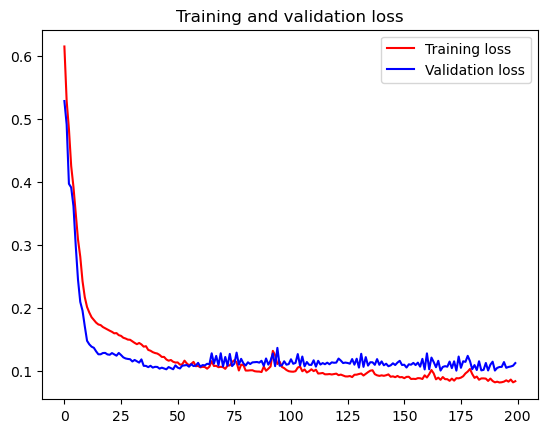

<Figure size 640x480 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [19]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

2/2 [==============================] - 0s 18ms/step


((156, 1), (39, 1))

# boosting

In [20]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)

In [21]:
clf.fit(X_train, Y_train.values.ravel()) 

C:\Users\vigne\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=100, random_state=0)

In [22]:
print("TRAIN SET", clf.score(X_train, Y_train))
print("TEST  SET", clf.score(X_test, Y_test))

TRAIN SET 1.0
TEST  SET 0.8717948717948718


In [23]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, Y.values.ravel(), cv=4)
scores

C:\Users\vigne\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\vigne\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\vigne\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\vigne\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


array([0.75510204, 0.85714286, 0.71428571, 0.75      ])

In [24]:
print("Average: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Average: 0.77 (+/- 0.11)


In [25]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc

In [26]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    target_names=['attack','not attack']
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[ 6  2]
 [ 3 28]]


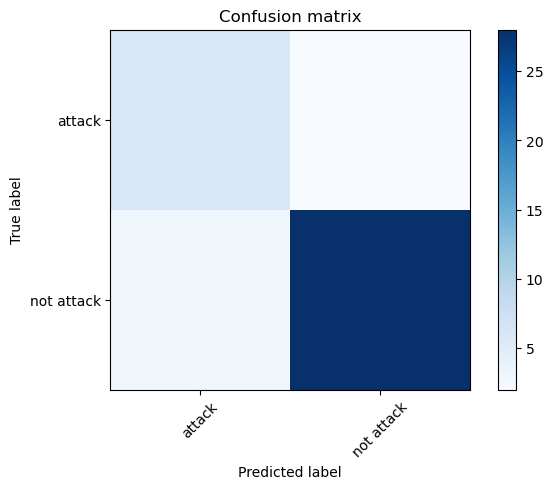

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(Y_test, clf.predict(X_test))
print(cm)
plot_confusion_matrix(cm)

In [28]:
print(classification_report(Y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.67      0.75      0.71         8
           1       0.93      0.90      0.92        31

    accuracy                           0.87        39
   macro avg       0.80      0.83      0.81        39
weighted avg       0.88      0.87      0.87        39



Building a Predictive System

In [29]:
input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")


1/1 [==============================] - 0s 179ms/step
[[0.25240266]]
The Person has Parkinsons


In [30]:
X_train.head(10)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
123,182.018,197.173,79.187,0.00842,0.00005,0.00506,0.00449,0.01517,0.02503,0.231,...,0.01931,0.04115,0.01813,18.784,0.589956,0.732903,-5.445140,0.142466,2.174306,0.215558
160,114.238,124.393,77.022,0.00581,0.00005,0.00299,0.00316,0.00896,0.04009,0.406,...,0.04114,0.04736,0.02073,20.437,0.653139,0.694571,-5.185987,0.259229,2.151121,0.244948
94,157.821,172.975,68.401,0.00358,0.00002,0.00196,0.00196,0.00587,0.03716,0.307,...,0.02764,0.06185,0.00850,22.219,0.502380,0.712170,-6.251425,0.188056,2.143851,0.160812
57,117.274,129.916,110.402,0.00752,0.00006,0.00299,0.00469,0.00898,0.02293,0.221,...,0.01948,0.03568,0.00681,22.817,0.530529,0.817756,-4.608260,0.290024,2.021591,0.314464
41,184.055,196.537,166.977,0.00258,0.00001,0.00134,0.00147,0.00403,0.01463,0.132,...,0.01234,0.02226,0.00257,26.453,0.306443,0.759203,-7.044105,0.063412,2.361532,0.115730
66,140.341,159.774,67.021,0.00817,0.00006,0.00430,0.00440,0.01289,0.03198,0.313,...,0.02428,0.05490,0.02183,19.560,0.460139,0.720908,-5.409423,0.226850,2.359973,0.226156
98,125.791,140.557,96.206,0.01378,0.00011,0.00826,0.00655,0.02478,0.04689,0.422,...,0.03908,0.07625,0.10323,15.433,0.571010,0.690892,-5.159169,0.202146,2.441612,0.260375
5,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,0.456,...,0.03243,0.06985,0.01222,21.378,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
53,129.336,139.867,118.604,0.00490,0.00004,0.00165,0.00183,0.00495,0.02498,0.228,...,0.01947,0.04188,0.00484,25.429,0.420383,0.785714,-6.836811,0.269866,2.223719,0.147491
111,208.519,220.315,199.020,0.00609,0.00003,0.00368,0.00339,0.01105,0.01761,0.155,...,0.01307,0.02855,0.00830,22.407,0.338097,0.712466,-6.471427,0.184378,2.502336,0.136390


In [31]:
Y_train

123    1
160    1
94     1
57     1
41     1
      ..
43     0
22     1
72     1
15     1
168    0
Name: status, Length: 156, dtype: int64

Saving the trained model

In [32]:
import pickle

In [33]:
filename = 'parkinsons_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [34]:
# loading the saved model
loaded_model = pickle.load(open('parkinsons_model.sav', 'rb'))

In [35]:
for column in X.columns:
  print(column)

MDVP:Fo(Hz)
MDVP:Fhi(Hz)
MDVP:Flo(Hz)
MDVP:Jitter(%)
MDVP:Jitter(Abs)
MDVP:RAP
MDVP:PPQ
Jitter:DDP
MDVP:Shimmer
MDVP:Shimmer(dB)
Shimmer:APQ3
Shimmer:APQ5
MDVP:APQ
Shimmer:DDA
NHR
HNR
RPDE
DFA
spread1
spread2
D2
PPE
